# Task 1 : Set up colab gpu runtime environment

In [1]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2024-02-22 12:13:57--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2024-02-22 12:13:57 (42.2 MB/s) - ‘helper.py’ saved [2813/2813]



In [2]:
!pip install gdown==4.3.1

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.3.1-py3-none-any.whl size=14472 sha256=c6604220166d84531ebcc8d4f7a2d199bf31fc523054d27f8ba604aead677256
  Stored in directory: /root/.cache/pip/wheels/e2/96/ae/e10e20acfcf61197f94419d57c2e228466b9f5cd3f326bb44a
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [3]:
!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.2 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=7b6a25593f82b1ff3d48d3445c69bb166d0a728eb1e94c8261704255a5441037
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=9e7e17b62f1061c75c73d03da6ca37a74b2047982d426f0a140b7ab6d73eb633
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-pytorch pretrainedmodels
  Cloning https://github.com/albumentations-team/albumenta

# Download Dataset


we use data from https://drive.google.com/uc?export=download&id=1XOBoRGSraP50_pS1YPB8_i8Wmw_5L-NG

In [4]:
!gdown --id "1XOBoRGSraP50_pS1YPB8_i8Wmw_5L-NG" -O "tmp"

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1XOBoRGSraP50_pS1YPB8_i8Wmw_5L-NG 



In [5]:
!nvidia-smi

Thu Feb 22 12:14:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Some Common Imports

In [6]:
import sys

In [7]:
import torch
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from torch.nn.functional import one_hot
import pandas as pd
import helper

from torch.utils.data import Dataset
import os
import numpy as np
from glob import glob

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive



# use personal drive to get data set



In [9]:
!cp "/content/gdrive/MyDrive/LaPa.tar.gz" "/content/tmp"

In [10]:
import os
if not os.path.exists('image'):
    os.makedirs('image')
!tar -xvf  '/content/tmp' -C '/content/image'

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
LaPa/train/labels/2818584124_13.png
LaPa/train/labels/LFPW_image_test_0157_1.png
LaPa/train/labels/4595280121_4.png
LaPa/train/labels/HELEN_2761106136_1_3.png
LaPa/train/labels/HELEN_3005087184_1_0.png
LaPa/train/labels/5906318280_1.png
LaPa/train/labels/HELEN_126968967_1_0.png
LaPa/train/labels/LFPW_image_test_0157_2.png
LaPa/train/labels/AFW_5002723411_2_9.png
LaPa/train/labels/LFPW_image_train_0292_6.png
LaPa/train/labels/12016442526_0.png
LaPa/train/labels/LFPW_image_train_0789_7.png
LaPa/train/labels/LFPW_image_train_0588_0.png
LaPa/train/labels/HELEN_173808384_2_5.png
LaPa/train/labels/6531382301_15.png
LaPa/train/labels/HELEN_2707642369_1_4.png
LaPa/train/labels/12268264184_13.png
LaPa/train/labels/71244599_2.png
LaPa/train/labels/6259612800_2.png
LaPa/train/labels/AFW_4906266640_1_1.png
LaPa/train/labels/HELEN_2414075021_1_0.png
LaPa/train/labels/HELEN_2233737284_1_3.png
LaPa/train/labels/HELEN_1419222657_1_1.png
LaPa/tra

# Task : 2 Setup Configurations
Select encoder : https://segmentation-modelspytorch.readthedocs.io/en/latest/


In [11]:
DATA_DIR = "image/LaPa"
PREPROCESS_DIR = "pre/LaPa"

DEVICE = 'cuda'

EPOCHS = 50
LR = 0.01
IMAGE_SIZE = 224
BATCH_SIZE = 64
num_classes = 11
ENCODER = 'mobilenet_v2'
WEIGHTS = 'imagenet'

In [12]:

print(len(glob(os.path.join(DATA_DIR, "train", "images", "*.jpg"))))

18168


In [13]:
global image_h
global image_w
global num_classes
global classes
global rgb_codes

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_dataset(path):
    train_x = sorted(glob(os.path.join(path, "train", "images", "*.jpg")))
    train_y = sorted(glob(os.path.join(path, "train", "labels", "*.png")))

    valid_x = sorted(glob(os.path.join(path, "val", "images", "*.jpg")))
    valid_y = sorted(glob(os.path.join(path, "val", "labels", "*.png")))

    test_x = sorted(glob(os.path.join(path, "test", "images", "*.jpg")))
    test_y = sorted(glob(os.path.join(path, "test", "labels", "*.png")))

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

def read_image_mask(x, y):
    """ Image """
    x = cv2.imread(x, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (image_w, image_h))
    x = x/255.0
    x = x.astype(np.float32)

    """ Mask """
    y = cv2.imread(y, cv2.IMREAD_GRAYSCALE)
    y = cv2.resize(y, (image_w, image_h))
    y = y.astype(np.int32)

    return x, y

def preprocess(path,pre_path):

    process_type = ["train","val","test"]
    if not os.path.exists('pre'):
        for t in process_type:
            os.makedirs('pre/LaPa/' + t + "/images/")
            os.makedirs('pre/LaPa/' + t + "/labels/")
    for t in process_type:
        img_x_url = sorted(glob(os.path.join(path,t,"images","*.jpg")))
        img_y_url = sorted(glob(os.path.join(path,t,"labels","*.png")))
        for x_url,y_url in tqdm(zip(img_x_url,img_y_url),total = len(img_x_url)):
            img = cv2.imread(x_url)
            mask = cv2.imread(y_url,0)
            img = cv2.resize(img,(224,224),interpolation= cv2.INTER_AREA)
            mask = cv2.resize(mask,(224,224),interpolation= cv2.INTER_AREA)
            cv2.imwrite(x_url.replace(path,pre_path),img)
            cv2.imwrite(y_url.replace(path,pre_path),mask)


In [14]:
preprocess(DATA_DIR,PREPROCESS_DIR)

  0%|          | 0/18168 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

# Task 3 : Augmentation Functions

albumentation documentation : https://albumentations.ai/docs/

In [15]:
import albumentations as A

In [16]:
def get_train_augs():
  return A.Compose([

      A.Resize(IMAGE_SIZE, IMAGE_SIZE),
      A.HorizontalFlip(p = 0.5),
      #A.Normalize(mean= (0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
     #A.augmentations.geometric.rotate.Rotate(limit = (-15,15))

  ], is_check_shapes=False)

def get_valid_augs():
  return A.Compose([
      A.Resize(IMAGE_SIZE, IMAGE_SIZE),
      #A.Normalize(mean= (0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
  ], is_check_shapes=False)

# Task 4 : Create Custom Dataset

In [17]:
class SegmentationDataset(Dataset):
  def __init__(self, data, augmentations):
    self.DataX= data[0]
    self.DataY =data[1]
    self.augmentations = augmentations

  def __len__(self):
    return len(self.DataX)

  def __getitem__(self, idx):
    image_path = self.DataX[idx]
    mask_path = self.DataY[idx]

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    mask = cv2.imread(mask_path, 0 )
    #mask = np.expand_dims(mask,axis = -1)

    if self.augmentations:
      data = self.augmentations(image = image, mask = mask)
      image = data['image']
      mask = data['mask']
    image = np.transpose(image, (2,0,1)).astype(np.float32)

    image = torch.Tensor(image) / 255.0
    #print(image.max())
    mask = torch.round(torch.Tensor(mask) / 1.0)
    #mask = mask.unsqueeze(0)
    mask = mask.long()

    return image, mask

In [18]:

train, val, test = load_dataset(PREPROCESS_DIR)
trainset = SegmentationDataset(train, get_train_augs())
validset = SegmentationDataset(val, get_valid_augs())
test = SegmentationDataset(test, get_valid_augs())

# Evaluate Dataset reading speed

In [19]:
for images,label in tqdm(trainset):
    continue

  0%|          | 0/18168 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
for images,label in tqdm(validset):
    continue

In [ ]:
for images,label in tqdm(test):
    continue

In [20]:
def show_image(image,mask,pred_image = None):
    from torch.nn.functional import one_hot

    if pred_image == None:

        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')


        masks = one_hot(mask,11)
        masks = masks.permute(2,0,1)

        ax2.set_title('GROUND TRUTH')
        grayscale_images = torch.Tensor(np.argmax(masks.numpy(), axis=0) * (255 / (masks.shape[0] - 1)))
        ax2.imshow(grayscale_images.permute(0,1).squeeze(),cmap = 'gray')

    elif pred_image != None :

        f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10,5))

        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')

        ax2.set_title('GROUND TRUTH')


        masks = one_hot(mask,11)
        masks = masks.permute(2,0,1)

        grayscale_images = torch.Tensor(np.argmax(masks.numpy(), axis=0) * (255 / (masks.shape[0] - 1)))
        ax2.imshow(grayscale_images.permute(0,1).squeeze(),cmap = 'gray')

        ax3.set_title('MODEL OUTPUT')
        pred_image = torch.Tensor(np.argmax(pred_image.numpy(), axis=0) * (255 / (pred_image.shape[0] - 1)))
        ax3.imshow(pred_image.permute(0,1).squeeze(),cmap = 'gray')

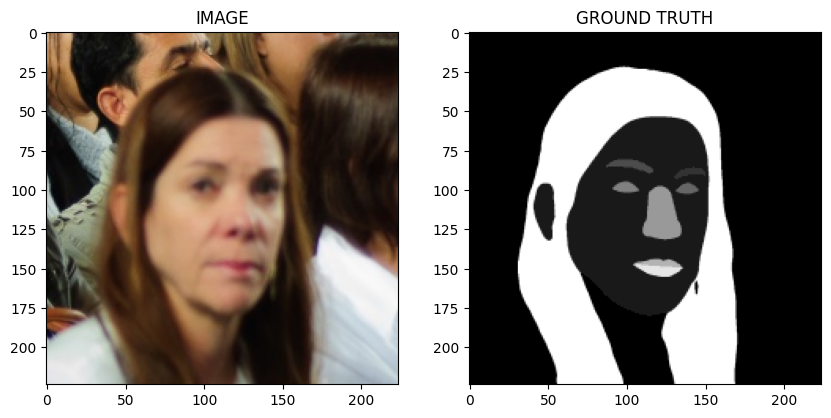

In [21]:
idx = 42
image, mask = trainset[idx]
show_image(image,mask)

In [22]:
print(mask.shape)

torch.Size([224, 224])


# Task 5 : Load dataset into batches

In [23]:
from torch.utils.data import DataLoader

In [24]:
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE,shuffle=True)
validloader = DataLoader(validset, batch_size=BATCH_SIZE)

In [25]:
testloader = DataLoader(test, batch_size=BATCH_SIZE)

In [26]:
for images,labes in tqdm(trainloader):
    continue

  0%|          | 0/284 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print(f"Size of Trainset : {len(trainset)}")
print(f"Size of Validset : {len(validset)}")

In [57]:
for image, mask in trainloader:
  break

print(f"One batch image shape : {image.shape}")
print(f"One batch mask shape : {mask.shape}")

One batch image shape : torch.Size([64, 3, 224, 224])
One batch mask shape : torch.Size([64, 224, 224])


# Task 6 : Create Segmentation Model

segmentation_models_pytorch documentation : https://smp.readthedocs.io/en/latest/

In [71]:
model_name = "model4"

In [72]:
from torch import nn
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.losses import FocalLoss

In [76]:
class SegmentationModel(nn.Module):
  def __init__(self):
    super(SegmentationModel,self).__init__()

    self.arc = smp.DeepLabV3Plus(
        encoder_name = ENCODER,
        encoder_weights = WEIGHTS,
        in_channels = 3,
        classes = num_classes,
        activation = None
    )
    print((self.arc.encoder.parameters()))
    for i,param in enumerate(self.arc.encoder.parameters()):
        #freeze 151 layer
        if (i > 20): break
        param.requires_grad = False
  def forward(self, images, masks = None):
    logits = self.arc(images)

    if masks != None:
      loss1 = FocalLoss(mode="multiclass")(logits,masks)
      #ignore unused class

      #loss1 = nn.CrossEntropyLoss()(logits,masks)
      return logits, loss1

    return logits




In [77]:
model = SegmentationModel()
model.to(DEVICE)

<generator object Module.parameters at 0x7e5df0a25fc0>


SegmentationModel(
  (arc): DeepLabV3Plus(
    (encoder): MobileNetV2Encoder(
      (features): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): InvertedResidual(
          (conv): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(inplace=True)
            )
            (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
        (2): InvertedResidual(
          (conv): Sequential(
      

In [78]:
from torchsummary import summary

summary(model, (3, IMAGE_SIZE, IMAGE_SIZE))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

# Task 7 : Create Train and Validation Function

In [80]:
def iou_score(pred_masks, masks):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
     # BATCH x 1 x H x W => BATCH x H x W
    SMOOTH = 1e-6
    masks = one_hot(masks,num_classes)  # BATCH x 1 x H x W => BATCH x H x W
    masks = masks.permute((0,3,1,2))

    intersection = (pred_masks & masks).float().sum((2,3))  # Will be zero if Truth=0 or Prediction=0
    union = (pred_masks | masks).float().sum((2,3))         # Will be zzero if both are 0

    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0
    iou = torch.mean(iou,axis = 1) # find mIoU over class
    return iou.mean()  # Or iou.mean() if you are interested in average across the batch

def train_fn(data_loader, model, optimizer):
  model.train()
  total_loss = 0.0
  total_iou = 0.0
  n = 0
  for images, masks in tqdm(data_loader):
    images = images.to(DEVICE)
    masks = masks.to(DEVICE)

    optimizer.zero_grad()
    ligits, loss = model(images, masks)

    loss.backward()
    optimizer.step()



    total_loss += loss.item()
    pred_masks = torch.softmax(ligits,dim = 1)
    #pred_masks = torch.sigmoid(ligits)
    pred_masks = torch.argmax(ligits, dim=1)

    pred_masks = one_hot(pred_masks,num_classes)
    pred_masks = pred_masks.permute((0,3,1,2))
    #pred_masks = (pred_masks > 0.5) * 1

    n += images.shape[0]
    total_iou += iou_score(pred_masks,masks)

 # print(f"loss on dice multiclass {loss_dice}\nloss on classifier {loss_classifier}")
  return total_loss / len(data_loader) , total_iou / len(data_loader)




def eval_fn(data_loader, model):
  model.eval()
  total_loss = 0.0
  total_iou = 0.0
  n = 0
  with torch.no_grad():

    for images, masks in tqdm(data_loader):
      images = images.to(DEVICE)
      masks = masks.to(DEVICE)


      ligits, loss = model(images, masks)
      pred_masks = torch.softmax(ligits,dim = 1)
      #pred_masks = torch.sigmoid(ligits)
      #pred_masks = (pred_masks > 0.5) * 1
      pred_masks = torch.argmax(ligits, dim=1)

      pred_masks = one_hot(pred_masks,num_classes)
      pred_masks = pred_masks.permute((0,3,1,2))

      n += images.shape[0]
      total_iou += iou_score(pred_masks,masks)
      total_loss += loss.item()
  #print(f"loss on dice multiclass {loss_dice}\nloss on classifier {loss_classifier}")
  return total_loss / len(data_loader) , total_iou/  len(data_loader)




# Early Stop

In [81]:
class EarlyStopper:
    def __init__(self,patience = 8,min_delta = 1e-4):
        self.min_delta = min_delta
        self.patience = patience
        self.counter = 0
        self.min_validation_loss = float('inf')
    def early_stop(self,validation_loss):
        if (validation_loss < self.min_validation_loss):
            self.counter = 0
            self.min_validation_loss = validation_loss
            return False
        elif (validation_loss > (self.min_validation_loss + self.min_delta)):
            self.counter += 1
            if (self.counter >= self.patience):
                return True
        return False

# Task 8 : Train Model


In [82]:
def train(trainloader,validloader,EPOCHS = 50, LR = 0.0001,Step = 4,patience = 5):
    best_valid_loss = np.Inf
    metric = {
        "train_loss" : [],
        "val_loss" : [],
        "train_acc" : [],
        "val_acc" : []
    }
    model = SegmentationModel()
    model.to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr = LR)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size = Step,gamma = 0.5)
    early = EarlyStopper(patience = patience)
    for i in range(EPOCHS):
        train_loss , train_acc = train_fn(trainloader, model, optimizer)
        print(f"train loss : {train_loss}, train accuracy(mIou) : {train_acc}")
        valid_loss , valid_acc = eval_fn(validloader, model)

        metric["train_loss"].append(train_loss)
        metric["train_acc"].append(train_acc)

        print(f"valid loss : {valid_loss}, valid accuracy(mIou) : {valid_acc}")

        metric["val_loss"].append(valid_loss)
        metric["val_acc"].append(valid_acc)
        if (early.early_stop(valid_loss)):
            break

        if valid_loss < best_valid_loss:
            torch.save(model.state_dict(), f'/content/gdrive/MyDrive/{model_name}.pt')
            print('saved model')
            best_valid_loss = valid_loss

        print(f"Epoch : {i+1} Train_loss : {train_loss}, Train_accuracy : {train_acc} Valid_loss : {valid_loss} Valid_accuracy : {valid_acc}")
    return model , metric

In [83]:
model , metric = train(trainloader,validloader,Step = 4,patience = 8)

<generator object Module.parameters at 0x7e5df0a26ce0>


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.5482206876114221, train accuracy(mIou) : 0.19264285266399384


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.2027154630050063, valid accuracy(mIou) : 0.23379434645175934
saved model
Epoch : 1 Train_loss : 0.5482206876114221, Train_accuracy : 0.19264285266399384 Valid_loss : 0.2027154630050063 Valid_accuracy : 0.23379434645175934


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.14346809968562194, train accuracy(mIou) : 0.2628435492515564


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.12409623246639967, valid accuracy(mIou) : 0.2866487205028534
saved model
Epoch : 2 Train_loss : 0.14346809968562194, Train_accuracy : 0.2628435492515564 Valid_loss : 0.12409623246639967 Valid_accuracy : 0.2866487205028534


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.1074465971807359, train accuracy(mIou) : 0.3121727705001831


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.10325943329371512, valid accuracy(mIou) : 0.34992682933807373
saved model
Epoch : 3 Train_loss : 0.1074465971807359, Train_accuracy : 0.3121727705001831 Valid_loss : 0.10325943329371512 Valid_accuracy : 0.34992682933807373


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.0924235541950649, train accuracy(mIou) : 0.3480287194252014


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.09158040094189346, valid accuracy(mIou) : 0.36493927240371704
saved model
Epoch : 4 Train_loss : 0.0924235541950649, Train_accuracy : 0.3480287194252014 Valid_loss : 0.09158040094189346 Valid_accuracy : 0.36493927240371704


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.08339300772673647, train accuracy(mIou) : 0.3711099326610565


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.08404233260080218, valid accuracy(mIou) : 0.3893841505050659
saved model
Epoch : 5 Train_loss : 0.08339300772673647, Train_accuracy : 0.3711099326610565 Valid_loss : 0.08404233260080218 Valid_accuracy : 0.3893841505050659


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.07740906395123039, train accuracy(mIou) : 0.3862559199333191


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.07965439511463046, valid accuracy(mIou) : 0.3973301649093628
saved model
Epoch : 6 Train_loss : 0.07740906395123039, Train_accuracy : 0.3862559199333191 Valid_loss : 0.07965439511463046 Valid_accuracy : 0.3973301649093628


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.07290933184115819, train accuracy(mIou) : 0.39681926369667053


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.07743649021722376, valid accuracy(mIou) : 0.40980416536331177
saved model
Epoch : 7 Train_loss : 0.07290933184115819, Train_accuracy : 0.39681926369667053 Valid_loss : 0.07743649021722376 Valid_accuracy : 0.40980416536331177


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.06992880973807523, train accuracy(mIou) : 0.4047587215900421


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.07505568349733949, valid accuracy(mIou) : 0.41406553983688354
saved model
Epoch : 8 Train_loss : 0.06992880973807523, Train_accuracy : 0.4047587215900421 Valid_loss : 0.07505568349733949 Valid_accuracy : 0.41406553983688354


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.06718769845303516, train accuracy(mIou) : 0.41083842515945435


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.07258805306628346, valid accuracy(mIou) : 0.4181821048259735
saved model
Epoch : 9 Train_loss : 0.06718769845303516, Train_accuracy : 0.41083842515945435 Valid_loss : 0.07258805306628346 Valid_accuracy : 0.4181821048259735


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.06511215859053421, train accuracy(mIou) : 0.41581210494041443


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.07167689222842455, valid accuracy(mIou) : 0.41849008202552795
saved model
Epoch : 10 Train_loss : 0.06511215859053421, Train_accuracy : 0.41581210494041443 Valid_loss : 0.07167689222842455 Valid_accuracy : 0.41849008202552795


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.06317248053743806, train accuracy(mIou) : 0.4200149476528168


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06948433141224086, valid accuracy(mIou) : 0.4276120066642761
saved model
Epoch : 11 Train_loss : 0.06317248053743806, Train_accuracy : 0.4200149476528168 Valid_loss : 0.06948433141224086 Valid_accuracy : 0.4276120066642761


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.06137431154526036, train accuracy(mIou) : 0.42429444193840027


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06879938871134073, valid accuracy(mIou) : 0.42946863174438477
saved model
Epoch : 12 Train_loss : 0.06137431154526036, Train_accuracy : 0.42429444193840027 Valid_loss : 0.06879938871134073 Valid_accuracy : 0.42946863174438477


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.060324215723700086, train accuracy(mIou) : 0.4272020161151886


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.0678043954540044, valid accuracy(mIou) : 0.4328457713127136
saved model
Epoch : 13 Train_loss : 0.060324215723700086, Train_accuracy : 0.4272020161151886 Valid_loss : 0.0678043954540044 Valid_accuracy : 0.4328457713127136


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.05933346255669292, train accuracy(mIou) : 0.42978304624557495


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06692531518638134, valid accuracy(mIou) : 0.43480971455574036
saved model
Epoch : 14 Train_loss : 0.05933346255669292, Train_accuracy : 0.42978304624557495 Valid_loss : 0.06692531518638134 Valid_accuracy : 0.43480971455574036


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.057897108292180886, train accuracy(mIou) : 0.43236956000328064


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06641780282370746, valid accuracy(mIou) : 0.4346751570701599
saved model
Epoch : 15 Train_loss : 0.057897108292180886, Train_accuracy : 0.43236956000328064 Valid_loss : 0.06641780282370746 Valid_accuracy : 0.4346751570701599


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.05726043929831243, train accuracy(mIou) : 0.43416494131088257


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.0655033370712772, valid accuracy(mIou) : 0.43828654289245605
saved model
Epoch : 16 Train_loss : 0.05726043929831243, Train_accuracy : 0.43416494131088257 Valid_loss : 0.0655033370712772 Valid_accuracy : 0.43828654289245605


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.0562046320558014, train accuracy(mIou) : 0.43643584847450256


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06552500044927001, valid accuracy(mIou) : 0.4423184096813202
Epoch : 17 Train_loss : 0.0562046320558014, Train_accuracy : 0.43643584847450256 Valid_loss : 0.06552500044927001 Valid_accuracy : 0.4423184096813202


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.05538122304780802, train accuracy(mIou) : 0.4381292462348938


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06506690487731248, valid accuracy(mIou) : 0.44332125782966614
saved model
Epoch : 18 Train_loss : 0.05538122304780802, Train_accuracy : 0.4381292462348938 Valid_loss : 0.06506690487731248 Valid_accuracy : 0.44332125782966614


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.05485615418882857, train accuracy(mIou) : 0.43986865878105164


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06453198369126767, valid accuracy(mIou) : 0.4425301253795624
saved model
Epoch : 19 Train_loss : 0.05485615418882857, Train_accuracy : 0.43986865878105164 Valid_loss : 0.06453198369126767 Valid_accuracy : 0.4425301253795624


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.05396921438178126, train accuracy(mIou) : 0.44132670760154724


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06386623007711023, valid accuracy(mIou) : 0.4432204067707062
saved model
Epoch : 20 Train_loss : 0.05396921438178126, Train_accuracy : 0.44132670760154724 Valid_loss : 0.06386623007711023 Valid_accuracy : 0.4432204067707062


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.053342593518990865, train accuracy(mIou) : 0.4427555799484253


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06471916323062032, valid accuracy(mIou) : 0.4445720613002777
Epoch : 21 Train_loss : 0.053342593518990865, Train_accuracy : 0.4427555799484253 Valid_loss : 0.06471916323062032 Valid_accuracy : 0.4445720613002777


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.052770884471460125, train accuracy(mIou) : 0.4440242648124695


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.0645657452987507, valid accuracy(mIou) : 0.4476948082447052
Epoch : 22 Train_loss : 0.052770884471460125, Train_accuracy : 0.4440242648124695 Valid_loss : 0.0645657452987507 Valid_accuracy : 0.4476948082447052


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.05235699701949324, train accuracy(mIou) : 0.4449481666088104


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06427464867010713, valid accuracy(mIou) : 0.4497700333595276
Epoch : 23 Train_loss : 0.05235699701949324, Train_accuracy : 0.4449481666088104 Valid_loss : 0.06427464867010713 Valid_accuracy : 0.4497700333595276


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.05168461865207679, train accuracy(mIou) : 0.44645532965660095


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06388327362947166, valid accuracy(mIou) : 0.4498767852783203
Epoch : 24 Train_loss : 0.05168461865207679, Train_accuracy : 0.44645532965660095 Valid_loss : 0.06388327362947166 Valid_accuracy : 0.4498767852783203


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.05122681443487674, train accuracy(mIou) : 0.44784921407699585


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06399412988685071, valid accuracy(mIou) : 0.449695348739624
Epoch : 25 Train_loss : 0.05122681443487674, Train_accuracy : 0.44784921407699585 Valid_loss : 0.06399412988685071 Valid_accuracy : 0.449695348739624


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.05132739664330869, train accuracy(mIou) : 0.4482996463775635


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06303925439715385, valid accuracy(mIou) : 0.4508386552333832
saved model
Epoch : 26 Train_loss : 0.05132739664330869, Train_accuracy : 0.4482996463775635 Valid_loss : 0.06303925439715385 Valid_accuracy : 0.4508386552333832


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.05045115732600991, train accuracy(mIou) : 0.4496137499809265


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06299356254749, valid accuracy(mIou) : 0.44991838932037354
saved model
Epoch : 27 Train_loss : 0.05045115732600991, Train_accuracy : 0.4496137499809265 Valid_loss : 0.06299356254749 Valid_accuracy : 0.44991838932037354


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04997385979275888, train accuracy(mIou) : 0.45077764987945557


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06425904727075249, valid accuracy(mIou) : 0.45238742232322693
Epoch : 28 Train_loss : 0.04997385979275888, Train_accuracy : 0.45077764987945557 Valid_loss : 0.06425904727075249 Valid_accuracy : 0.45238742232322693


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04950039353693875, train accuracy(mIou) : 0.4516823887825012


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06374827120453119, valid accuracy(mIou) : 0.4525257647037506
Epoch : 29 Train_loss : 0.04950039353693875, Train_accuracy : 0.4516823887825012 Valid_loss : 0.06374827120453119 Valid_accuracy : 0.4525257647037506


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04922560181363787, train accuracy(mIou) : 0.45262640714645386


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06387911224737763, valid accuracy(mIou) : 0.4543491005897522
Epoch : 30 Train_loss : 0.04922560181363787, Train_accuracy : 0.45262640714645386 Valid_loss : 0.06387911224737763 Valid_accuracy : 0.4543491005897522


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04880098698162277, train accuracy(mIou) : 0.4534764885902405


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06289745878893882, valid accuracy(mIou) : 0.4543463885784149
saved model
Epoch : 31 Train_loss : 0.04880098698162277, Train_accuracy : 0.4534764885902405 Valid_loss : 0.06289745878893882 Valid_accuracy : 0.4543463885784149


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04963530975223427, train accuracy(mIou) : 0.45341479778289795


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06273397139739245, valid accuracy(mIou) : 0.45652782917022705
saved model
Epoch : 32 Train_loss : 0.04963530975223427, Train_accuracy : 0.45341479778289795 Valid_loss : 0.06273397139739245 Valid_accuracy : 0.45652782917022705


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.048222033057729125, train accuracy(mIou) : 0.45496469736099243


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06287963385693729, valid accuracy(mIou) : 0.4594656527042389
Epoch : 33 Train_loss : 0.048222033057729125, Train_accuracy : 0.45496469736099243 Valid_loss : 0.06287963385693729 Valid_accuracy : 0.4594656527042389


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.047794177944601425, train accuracy(mIou) : 0.4560951292514801


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06272992631420493, valid accuracy(mIou) : 0.4561537802219391
saved model
Epoch : 34 Train_loss : 0.047794177944601425, Train_accuracy : 0.4560951292514801 Valid_loss : 0.06272992631420493 Valid_accuracy : 0.4561537802219391


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04744006857328432, train accuracy(mIou) : 0.4568239152431488


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06341336958575994, valid accuracy(mIou) : 0.45535415410995483
Epoch : 35 Train_loss : 0.04744006857328432, Train_accuracy : 0.4568239152431488 Valid_loss : 0.06341336958575994 Valid_accuracy : 0.45535415410995483


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.047191361503177126, train accuracy(mIou) : 0.45754683017730713


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06320578523445874, valid accuracy(mIou) : 0.45683029294013977
Epoch : 36 Train_loss : 0.047191361503177126, Train_accuracy : 0.45754683017730713 Valid_loss : 0.06320578523445874 Valid_accuracy : 0.45683029294013977


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04690308744271456, train accuracy(mIou) : 0.45842865109443665


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06337193038780242, valid accuracy(mIou) : 0.4582385718822479
Epoch : 37 Train_loss : 0.04690308744271456, Train_accuracy : 0.45842865109443665 Valid_loss : 0.06337193038780242 Valid_accuracy : 0.4582385718822479


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04674710991831733, train accuracy(mIou) : 0.459120512008667


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06403650995343924, valid accuracy(mIou) : 0.4582800567150116
Epoch : 38 Train_loss : 0.04674710991831733, Train_accuracy : 0.459120512008667 Valid_loss : 0.06403650995343924 Valid_accuracy : 0.4582800567150116


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04714656598918455, train accuracy(mIou) : 0.4591217041015625


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06217391847167164, valid accuracy(mIou) : 0.45948395133018494
saved model
Epoch : 39 Train_loss : 0.04714656598918455, Train_accuracy : 0.4591217041015625 Valid_loss : 0.06217391847167164 Valid_accuracy : 0.45948395133018494


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.046404397456159055, train accuracy(mIou) : 0.45999935269355774


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06388572219293565, valid accuracy(mIou) : 0.45988884568214417
Epoch : 40 Train_loss : 0.046404397456159055, Train_accuracy : 0.45999935269355774 Valid_loss : 0.06388572219293565 Valid_accuracy : 0.45988884568214417


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04595652428573706, train accuracy(mIou) : 0.4609200954437256


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.0641268480103463, valid accuracy(mIou) : 0.4588712751865387
Epoch : 41 Train_loss : 0.04595652428573706, Train_accuracy : 0.4609200954437256 Valid_loss : 0.0641268480103463 Valid_accuracy : 0.4588712751865387


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04564607750729356, train accuracy(mIou) : 0.46155208349227905


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06418001826386899, valid accuracy(mIou) : 0.46153882145881653
Epoch : 42 Train_loss : 0.04564607750729356, Train_accuracy : 0.46155208349227905 Valid_loss : 0.06418001826386899 Valid_accuracy : 0.46153882145881653


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.0454750394868389, train accuracy(mIou) : 0.46236568689346313


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.0637002264847979, valid accuracy(mIou) : 0.4618403911590576
Epoch : 43 Train_loss : 0.0454750394868389, Train_accuracy : 0.46236568689346313 Valid_loss : 0.0637002264847979 Valid_accuracy : 0.4618403911590576


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04520675643596431, train accuracy(mIou) : 0.4629576802253723


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06397693778853863, valid accuracy(mIou) : 0.46008068323135376
Epoch : 44 Train_loss : 0.04520675643596431, Train_accuracy : 0.4629576802253723 Valid_loss : 0.06397693778853863 Valid_accuracy : 0.46008068323135376


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04504105055206258, train accuracy(mIou) : 0.46360430121421814


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.0636394068133086, valid accuracy(mIou) : 0.46063414216041565
Epoch : 45 Train_loss : 0.04504105055206258, Train_accuracy : 0.46360430121421814 Valid_loss : 0.0636394068133086 Valid_accuracy : 0.46063414216041565


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.04510293363160651, train accuracy(mIou) : 0.4640732705593109


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06473758188076317, valid accuracy(mIou) : 0.4620129466056824
Epoch : 46 Train_loss : 0.04510293363160651, Train_accuracy : 0.4640732705593109 Valid_loss : 0.06473758188076317 Valid_accuracy : 0.4620129466056824


  0%|          | 0/284 [00:00<?, ?it/s]

train loss : 0.0446182722750474, train accuracy(mIou) : 0.46472063660621643


  0%|          | 0/32 [00:00<?, ?it/s]

valid loss : 0.06406553962733597, valid accuracy(mIou) : 0.4589250981807709


# Task 9 : visualize metric




In [84]:
model.load_state_dict(torch.load(f'/content/gdrive/MyDrive/{model_name}.pt'))

<All keys matched successfully>

In [85]:
for i,val in enumerate(metric["train_acc"]):
    metric["train_acc"][i] = val.cpu()

for i,val in enumerate(metric["val_acc"]):
    metric["val_acc"][i] = val.cpu()

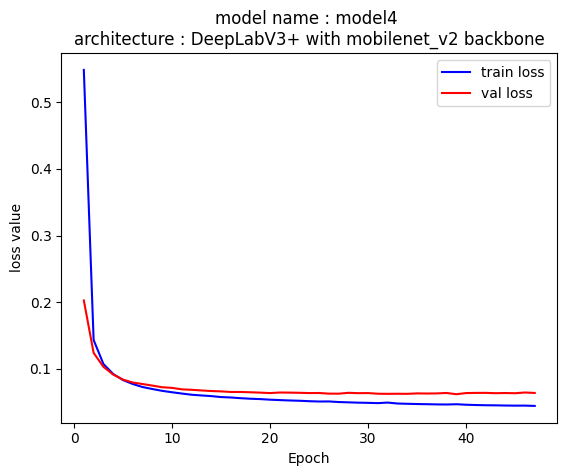

In [86]:
# show loss
plt.plot(np.arange(1,len(metric["train_loss"]) + 1),metric["train_loss"],label = "train loss",c = 'blue')
plt.plot(np.arange(1,len(metric["val_loss"]) + 1),metric["val_loss"],label = "val loss",c = 'red')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("loss value")
plt.title(f"model name : {model_name} \narchitecture : DeepLabV3+ with {ENCODER} backbone")
plt.savefig(f"/content/gdrive/MyDrive/{model_name}_loss.png")
plt.show()

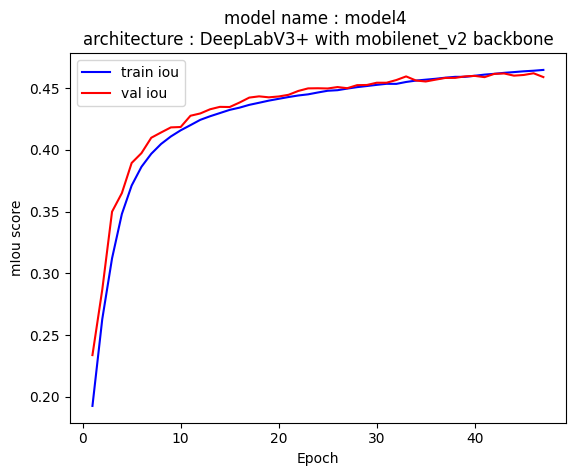

In [87]:
# show iou score
plt.plot(np.arange(1,len(metric["train_acc"]) + 1),metric["train_acc"],label = "train iou",c = 'blue')
plt.plot(np.arange(1,len(metric["val_acc"]) + 1),metric["val_acc"],label = "val iou",c = 'red')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("mIou score")
plt.title(f"model name : {model_name} \narchitecture : DeepLabV3+ with {ENCODER} backbone")
plt.savefig(f"/content/gdrive/MyDrive/{model_name}_iou.png")
plt.show()


## interface

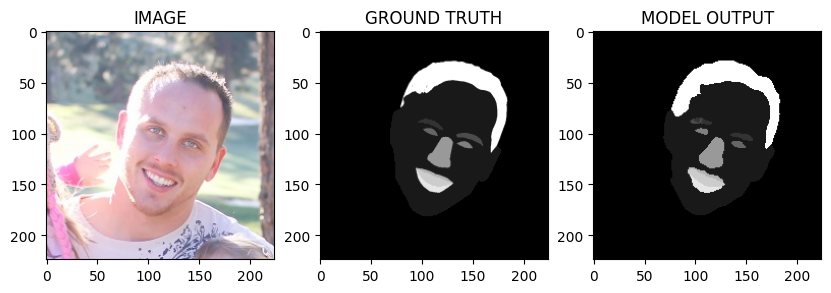

In [88]:
model.eval()
with torch.no_grad():
    idx = 120
    image, mask = validset[idx]

    logits_mask = model(image.to(DEVICE).unsqueeze(0))
    pred_mask = torch.softmax(logits_mask,dim = 1)
    pred_mask = torch.argmax(logits_mask, dim= 1)
    pred_mask = one_hot(pred_mask,num_classes)
    pred_mask = pred_mask.permute((0,3,1,2))

    show_image(image,mask,pred_mask.detach().cpu().squeeze(0))

In [89]:
print(image.shape)
logits = model(image.to(DEVICE).unsqueeze(0))

torch.Size([3, 224, 224])


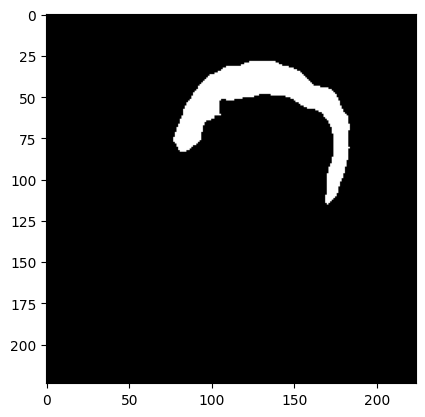

In [90]:
plt.imshow(pred_mask.detach().cpu().squeeze(0)[10,:,:],cmap = 'gray')
plt.show()

# Task 10  Evaluation

In [91]:
model.load_state_dict(torch.load(f'/content/gdrive/MyDrive/{model_name}.pt'))

<All keys matched successfully>

In [92]:
def multi_iou_score(pred_masks, masks):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
     # BATCH x 1 x H x W => BATCH x H x W
    SMOOTH = 1e-6
    masks = one_hot(masks,num_classes)  # BATCH x 1 x H x W => BATCH x H x W
    masks = masks.permute((0,3,1,2))

    intersection = (pred_masks & masks).float().sum((2,3))  # Will be zero if Truth=0 or Prediction=0
    union = (pred_masks | masks).float().sum((2,3))         # Will be zzero if both are 0

    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0
    iou = torch.mean(iou,axis = 0)
    return iou  # Or iou.mean() if you are interested in average across the batch

In [93]:
def eval_multi_fn(data_loader, model):
  model.eval()
  total_loss = 0.0
  total_iou = torch.zeros(num_classes)
  n = 0
  with torch.no_grad():

    for images, masks in tqdm(data_loader):
      images = images.to(DEVICE)
      masks = masks.to(DEVICE)


      ligits, loss = model(images, masks)

      pred_masks = torch.softmax(ligits , dim = 1)
      pred_masks = torch.argmax(ligits, dim=1)

      pred_masks = one_hot(pred_masks,num_classes)
      pred_masks = pred_masks.permute((0,3,1,2))

      total_iou += multi_iou_score(pred_masks,masks).cpu()
      total_loss += loss.item()
  #print(f"loss on dice multiclass {loss_dice}\nloss on classifier {loss_classifier}")
  return total_loss / len(data_loader) , total_iou/len(data_loader)


class 0 = background

class 1 = skin

class 2 = left brown

class 3 = right brown

class 4 = left eye

class 5 = right eye

class 6 = nose

class 7 = upper lip

class 8 = mouth

class 9 = lower lip

class 10 = hair

In [94]:
test_loss, test_iou = eval_multi_fn(testloader,model)


  0%|          | 0/32 [00:00<?, ?it/s]

In [95]:
test_criterion = pd.DataFrame(test_iou.numpy(),index = ["background","skin","left brown","right brown","left eye","right eye","nose","upper lip","mouth","lower lip","hair"],columns = ["IoU Score each class"])
test_criterion.to_csv(f'/content/gdrive/MyDrive/{model_name}_test_class.csv')

In [96]:
test_loss, test_iou = eval_fn(testloader,model)
print(f"evaluate loss : {test_loss} evaluate mIou : {test_iou}")
with open(f'/content/gdrive/MyDrive/{model_name}_test.txt','w') as file:
    file.write(f"evaluate loss : {test_loss} evaluate mIou : {test_iou}")

  0%|          | 0/32 [00:00<?, ?it/s]

evaluate loss : 0.06160693848505616 evaluate mIou : 0.46156325936317444


# For updates about upcoming and current guided projects follow me on...

Twitter : @parth_AI

Linkedin : www.linkedin.com/in/pdhameliya